In [8]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Cumulative adoption data for Apple Music subscribers
months_since_launch = np.array([0, 3, 4, 5, 6, 7, 8, 10, 11, 12, 18, 21, 27, 28, 29, 35, 42, 48, 54, 60])
cumulative_subscribers = np.array([6.50, 10, 11, 12, 13, 14, 15, 16, 17, 20, 27, 30, 38, 40, 50, 56, 60, 68, 72, 78])

# Bass model equation
def bass_model(t, m, p, q):
    return m * (1 - np.exp(-(p+q)*t)) / (1 + q/p * np.exp(-(p+q)*t))

# Fit the Bass model to the data
p0 = (100, 0.1, 0.1)  # Initial guess for parameters (m, p, q)
params, _ = curve_fit(bass_model, months_since_launch, cumulative_subscribers, p0=p0)

m, p, q = params
print("Estimated Bass model parameters:")
print("Total potential market size (m):", m)
print("Coefficient of innovation (p):", p)
print("Coefficient of imitation (q):", q)




Estimated Bass model parameters:
Total potential market size (m): 274.2848419788248
Coefficient of innovation (p): 0.006688950433406182
Coefficient of imitation (q): -0.0066900533888431


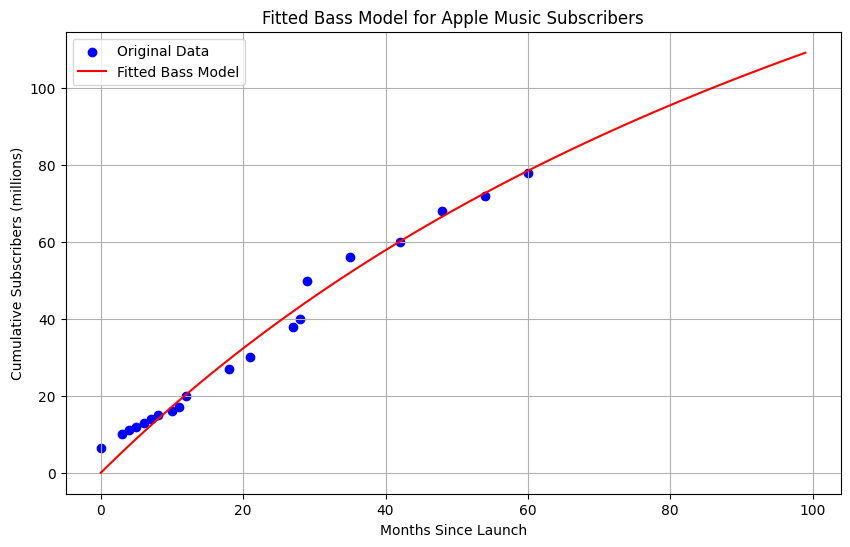

In [10]:
predicted_months = np.arange(0, 100, 1)  # Predict for 100 months
predicted_subscribers = bass_model(predicted_months, *params)

# Plot the fitted Bass model and the original data
plt.figure(figsize=(10, 6))
plt.scatter(months_since_launch, cumulative_subscribers, label='Original Data', color='blue')
plt.plot(predicted_months, predicted_subscribers, label='Fitted Bass Model', color='red')
plt.xlabel('Months Since Launch')
plt.ylabel('Cumulative Subscribers (millions)')
plt.title('Fitted Bass Model for Apple Music Subscribers')
plt.legend()
plt.grid(True)
plt.show()

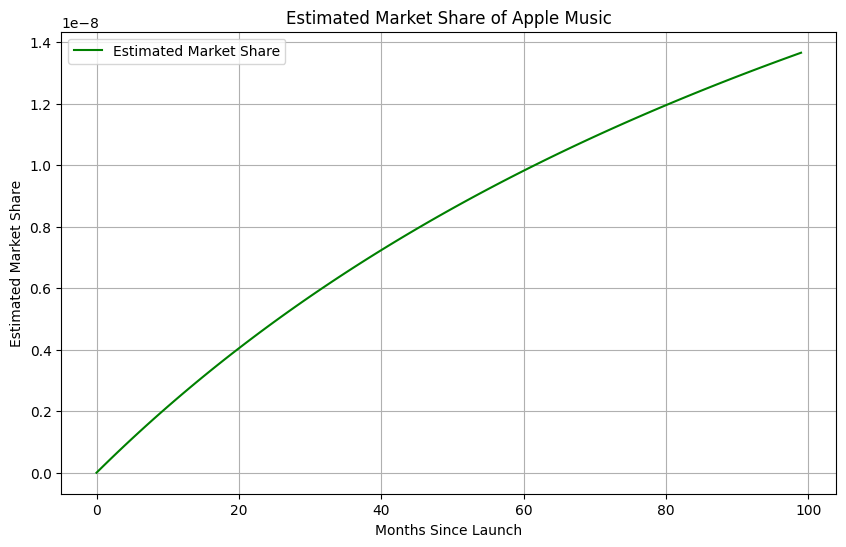

In [11]:
total_potential_market = 8e9  # Assumed total population of potential users

# Estimating the number of adopters by period using Fermi's logic
estimated_adopters = bass_model(predicted_months, m, p, q)
estimated_market_share = estimated_adopters / total_potential_market

# Estimating market share over time
plt.figure(figsize=(10, 6))
plt.plot(predicted_months, estimated_market_share, label='Estimated Market Share', color='green')
plt.xlabel('Months Since Launch')
plt.ylabel('Estimated Market Share')
plt.title('Estimated Market Share of Apple Music')
plt.legend()
plt.grid(True)
plt.show()